# Identifying the Authors of Classic English Fiction Books

Given an exerpt from an English text, we hope to create a classifcation model that will be able to identify the probability that the work was writtne by a particular author. Our model will use stylometric features (quantifiable features that capture some element of a work's style) to classify and assign works to differnt authors. The candidate authors are Charles Dickens, Jane Austen, Mark Twain, etc.

Given a text in English, we wish to perform a classification in predicting what author among several possible candidates wrote it. The writing styles of any two authors generally differs, and we hope to build a model that recognizes this difference in a consistent way. 
...label chunks of texts to one out of several possible candidate authors. The candidate authors are Charles Dickens, Jane Austen, Mark Twain (add more).


# Imports 

The next cell contains libraries that need to be installed before modeling.

In [1]:
import pandas as pd
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
author2grams1 = pd.read_csv("2author1grams.csv",header = 0, index_col = 0)
author2grams2 = pd.read_csv("2author2grams.csv",header = 0, index_col = 0)
author2grams3 = pd.read_csv("2author3grams.csv",header = 0, index_col = 0)
author2 = [author2grams1, author2grams2, author2grams3]


In [3]:
kfold_OVR = []
kfold_OVO = []
kfold_SVM = []

for gram in author2:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())

    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVO.append(results.mean())

    modelCV = svm.SVC(kernel='linear', C=1)
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM.append(results.mean())

author2 = pd.DataFrame({"kfold_OVR": kfold_OVR, "kfold_OVO":kfold_OVO,"kfold_SVM": kfold_SVM },index = [1,2,3])

In [4]:
author2

,kfold_OVO,kfold_OVR,kfold_SVM
1,0.91,0.91,0.93
2,0.89,0.89,0.89
3,0.92,0.92,0.92


Text(0.5,0,'Number of Grams')

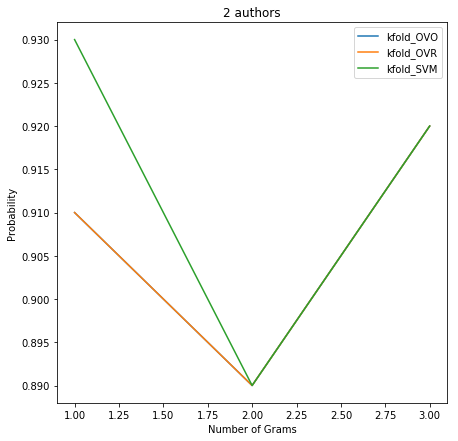

In [5]:
ax =author2.plot.line(figsize=(7,7), title='2 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

In [6]:
kfold_OVR = []
kfold_OVO = []
kfold_SVM = []

author3grams1 = pd.read_csv("3author1grams.csv",header = 0, index_col = 0)
author3grams2 = pd.read_csv("3author2grams.csv",header = 0, index_col = 0)
author3grams3 = pd.read_csv("3author3grams.csv",header = 0, index_col = 0)
author3 = [author3grams1, author3grams2, author3grams3]

for gram in author3:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVO.append(results.mean())

    modelCV = svm.SVC(kernel='linear', C=1)
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM.append(results.mean())

author3 = pd.DataFrame({"kfold_OVR": kfold_OVR, "kfold_OVO":kfold_OVO,"kfold_SVM": kfold_SVM },index = [1,2,3])

In [7]:
author3

,kfold_OVO,kfold_OVR,kfold_SVM
1,0.685714,0.642857,0.621429
2,0.551786,0.562500,0.591071
3,0.551786,0.562500,0.591071


Text(0.5,0,'Number of Grams')

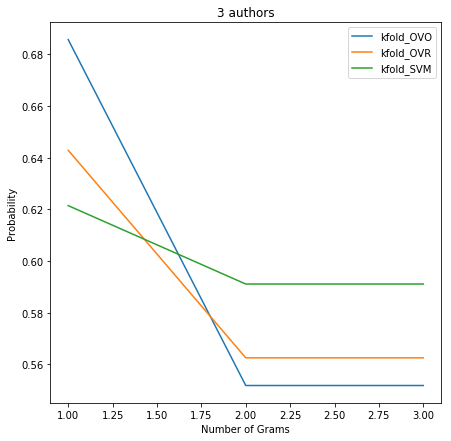

In [8]:
ax =author3.plot.line(figsize=(7,7), title='3 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

In [9]:
kfold_OVR = []
kfold_OVO = []
kfold_SVM = []

author4grams1 = pd.read_csv("4author1grams.csv",header = 0, index_col = 0)
author4grams2 = pd.read_csv("4author2grams.csv",header = 0, index_col = 0)
author4 = [author4grams1, author4grams2]

for gram in author4:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVO.append(results.mean())

    modelCV = svm.SVC(kernel='linear', C=1)
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM.append(results.mean())

author4 = pd.DataFrame({"kfold_OVR": kfold_OVR, "kfold_OVO":kfold_OVO,"kfold_SVM": kfold_SVM },index = [1,2])

In [10]:
author4

,kfold_OVO,kfold_OVR,kfold_SVM
1,0.536667,0.431111,0.622222
2,0.526667,0.387778,0.578889


Text(0.5,0,'Number of Grams')

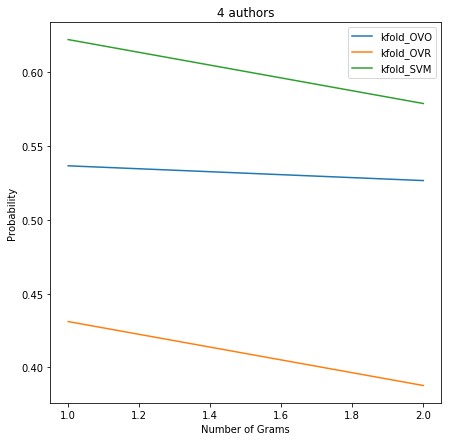

In [11]:
ax =author4.plot.line(figsize=(7,7), title='4 authors')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Grams")

In [12]:
OVO_df = pd.DataFrame()
OVO_df=OVO_df.append(author2['kfold_OVO'])
OVO_df=OVO_df.append(author3['kfold_OVO'])
OVO_df=OVO_df.append(author4['kfold_OVO'])
new_index = [2, 3, 4]
new_columns = ["1 gram","2 gram","3 gram"]
OVO_df.index = new_index
OVO_df.columns = new_columns
OVO_df

,1 gram,2 gram,3 gram
2,0.910000,0.890000,0.920000
3,0.685714,0.551786,0.551786
4,0.536667,0.526667,NaN


Text(0.5,0,'Number of Authors')

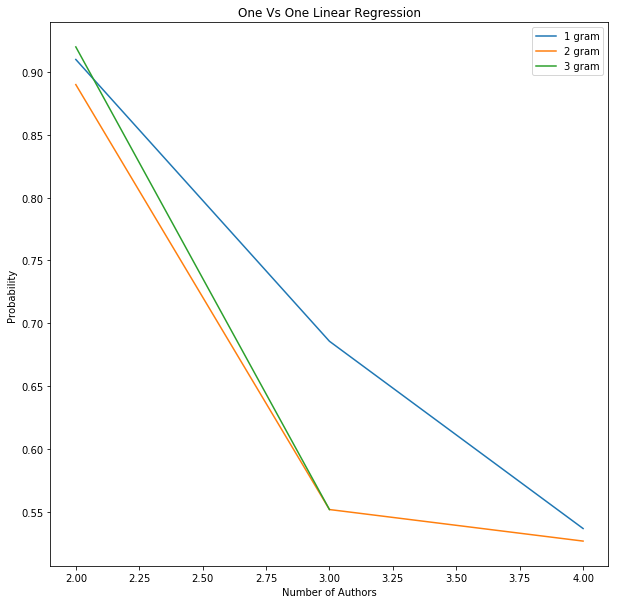

In [13]:
ax = OVO_df.plot(kind = 'line',figsize=(10,10), title='One Vs One Linear Regression')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [14]:
OVR_df = pd.DataFrame()
OVR_df=OVR_df.append(author2['kfold_OVR'])
OVR_df=OVR_df.append(author3['kfold_OVR'])
OVR_df=OVR_df.append(author4['kfold_OVR'])
OVR_df.index = new_index
OVR_df.columns = new_columns
OVR_df

,1 gram,2 gram,3 gram
2,0.910000,0.890000,0.9200
3,0.642857,0.562500,0.5625
4,0.431111,0.387778,NaN


Text(0.5,0,'Number of Authors')

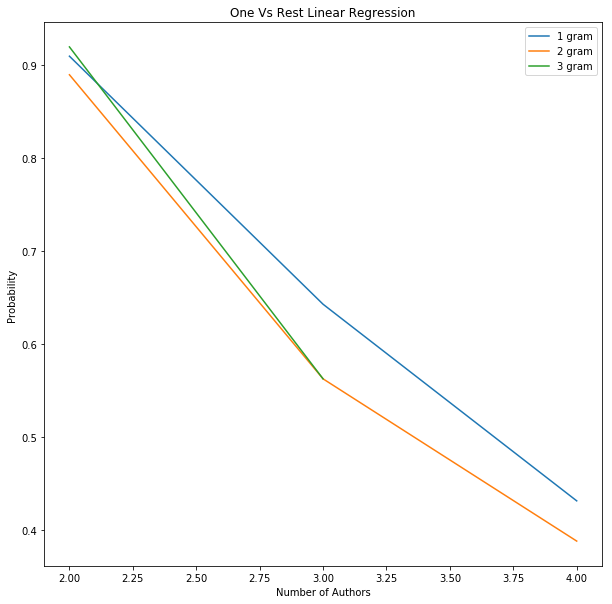

In [15]:
ax = OVR_df.plot(kind = 'line',figsize=(10,10), title='One Vs Rest Linear Regression')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [16]:
SVM_df = pd.DataFrame()
SVM_df=SVM_df.append(author2['kfold_SVM'])
SVM_df=SVM_df.append(author3['kfold_SVM'])
SVM_df=SVM_df.append(author4['kfold_SVM'])
SVM_df.index = new_index
SVM_df.columns = new_columns
SVM_df

,1 gram,2 gram,3 gram
2,0.930000,0.890000,0.920000
3,0.621429,0.591071,0.591071
4,0.622222,0.578889,NaN


Text(0.5,0,'Number of Authors')

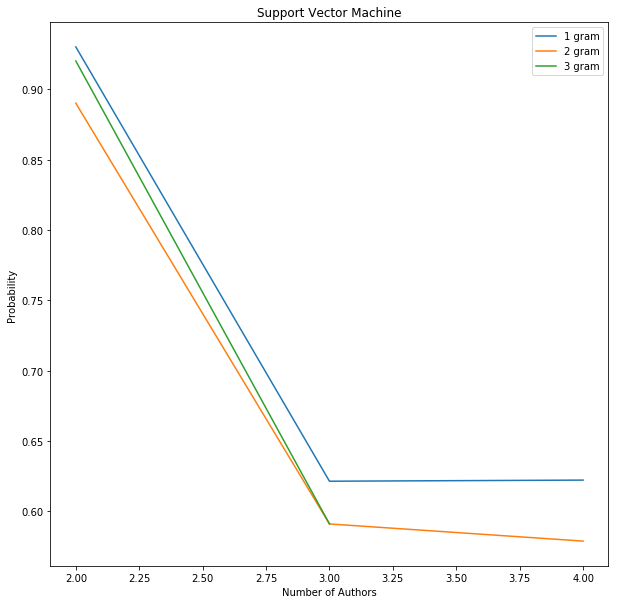

In [17]:
ax = SVM_df.plot(kind = 'line',figsize=(10,10), title='Support Vector Machine')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")

In [18]:
author2grams1 = pd.read_csv("2author1grams.csv",header = 0, index_col = 0)
author3grams1 = pd.read_csv("3author1grams.csv",header = 0, index_col = 0)
author4grams1 = pd.read_csv("4author1grams.csv",header = 0, index_col = 0)
author5grams1 = pd.read_csv("5author1grams.csv",header = 0, index_col = 0)
author6grams1 = pd.read_csv("6author1grams.csv",header = 0, index_col = 0)
author7grams1 = pd.read_csv("7author1grams.csv",header = 0, index_col = 0)
author8grams1 = pd.read_csv("8author1grams.csv",header = 0, index_col = 0)
author9grams1 = pd.read_csv("9author1grams.csv",header = 0, index_col = 0)
author10grams1 = pd.read_csv("10author1grams.csv",header = 0, index_col = 0)

grams = [author2grams1,author3grams1,author4grams1,author5grams1,author6grams1,author7grams1,author8grams1,author9grams1,author10grams1]

In [19]:
kfold_OVR = []
kfold_OVO = []
kfold_SVM = []

for gram in grams:
    y = gram['original_book_author']
    X = gram.drop(columns = ['original_book_author'])
    
    scoring = 'accuracy'

    kfold = model_selection.KFold(n_splits=10, random_state=None)
    modelCV = OneVsRestClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVR.append(results.mean())
    
    modelCV = OneVsOneClassifier(LogisticRegression())
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_OVO.append(results.mean())

    modelCV = svm.SVC(kernel='linear', C=1)
    results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
    kfold_SVM.append(results.mean())

gram1 = pd.DataFrame({"kfold_OVR": kfold_OVR, "kfold_OVO":kfold_OVO,"kfold_SVM": kfold_SVM },index = [2,3,4,5,6,7,8,9,10])

In [20]:
gram1

,kfold_OVO,kfold_OVR,kfold_SVM
2,0.910000,0.910000,0.930000
3,0.685714,0.642857,0.621429
4,0.536667,0.431111,0.622222
5,0.382576,0.345455,0.473485
6,0.259890,0.221429,0.296703
7,0.291830,0.286601,0.325490
8,0.193676,0.141107,0.185375
9,0.139231,0.103385,0.171538
10,0.079785,0.020000,0.082903


Text(0.5,0,'Number of Authors')

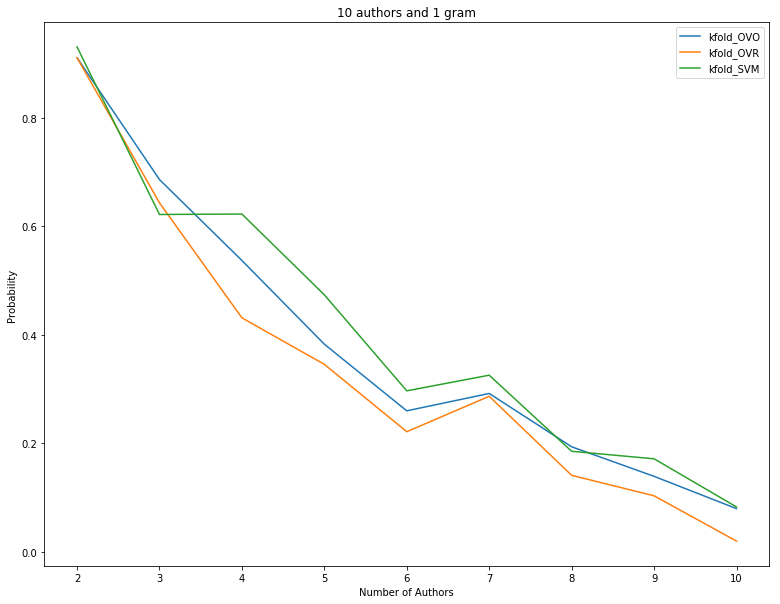

In [25]:
ax =gram1.plot.line(figsize=(13,10), title='10 authors and 1 gram')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Authors")